In [1]:
import pytesseract
from PIL import Image
import os

In [2]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'  

In [3]:
def load_data(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img = Image.open(os.path.join(label_folder, filename))
            img = img.convert('L')
            images.append(img)
            labels.append(label)
    return images, labels

In [4]:
# Load the images and labels
train_images, train_labels = load_data('coins/data/train')
test_images, test_labels = load_data('coins/data/test')

In [5]:
len(train_images)

6413

In [6]:
len(train_labels)

6413

In [ ]:
# Define a function to extract text from an image using Tesseract OCR
def extract_text(image):
    return pytesseract.image_to_string(image)

In [8]:
%%time

# Extract text from the training images
train_text = []
for image in train_images:
    train_text.append(extract_text(image))

Wall time: 30min 21s


In [9]:
%%time

# Extract text from the test images
test_text = []
for image in test_images:
    test_text.append(extract_text(image))

Wall time: 4min 2s


In [10]:
%%time

# Fit a logistic regression model to the extracted text
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

lr_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])

lr_model.fit(train_text, train_labels)

Wall time: 7.1 s


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [11]:
from sklearn.metrics import accuracy_score

# Evaluate the model on the test set
test_preds = lr_model.predict(test_text)
test_accuracy = accuracy_score(test_labels, test_preds)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.07582938388625593


In [14]:
lr_model.fit(train_text, train_labels)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [16]:
from sklearn.metrics import accuracy_score

# Evaluate the model on the test set
test_preds = lr_model.predict(test_text)
test_accuracy = accuracy_score(test_labels, test_preds)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.07582938388625593


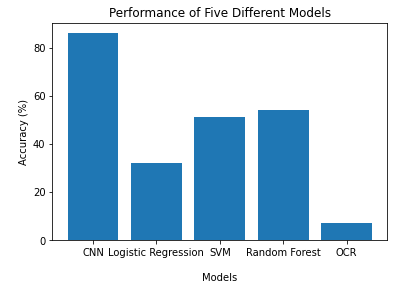

In [5]:
import matplotlib.pyplot as plt

models = ['CNN', 'Logistic Regression', 'SVM', 'Random Forest', 'OCR']
accuracy = [86, 32, 51, 54, 7]

plt.bar(models, accuracy)
plt.xlabel("\nModels")
plt.ylabel("\nAccuracy (%)")
plt.title("Performance of Five Different Models")
plt.show()


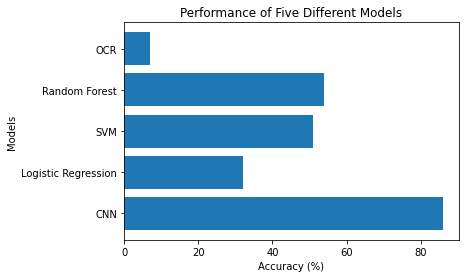

In [2]:
import matplotlib.pyplot as plt

models = ['CNN', 'Logistic Regression', 'SVM', 'Random Forest', 'OCR']
accuracy = [86, 32, 51, 54, 7]

plt.barh(models, accuracy)
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Performance of Five Different Models")
plt.show()


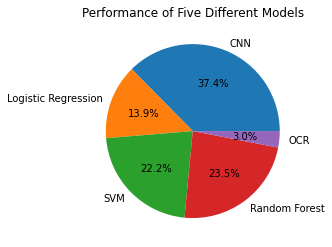

In [3]:
import matplotlib.pyplot as plt

models = ['CNN', 'Logistic Regression', 'SVM', 'Random Forest', 'OCR']
accuracy = [86, 32, 51, 54, 7]

plt.pie(accuracy, labels=models, autopct='%1.1f%%')
plt.title("Performance of Five Different Models")
plt.show()
